In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from Bio.SeqUtils import GC
from genslm_esm.dataset import read_fasta

/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
aminoacid_embeddings = np.load(
    "./ec_embeddings_v1/ec_v1_contrastive_8m_v3_aminoacid_embeddings.npy"
)
codon_embeddings = np.load(
    "./ec_embeddings_v1/ec_v1_contrastive_8m_v3_codon_embeddings.npy"
)
esm8m_embeddings = np.load(
    "./ec_embeddings_v1/ec_v1_test_8m_esm2_aminoacid_embeddings.npy"
)

labels = np.load("./ec_data_v1/ec_v1_test_labels.npy")

# Print number of unique EC labels
print(len(np.unique(labels)))

# Only consider the first two EC levels (e.g., 1.1)
labels = np.array([".".join(label.split(".")[:2]) for label in labels])
sequences = read_fasta("./ec_data_v1/ec_v1_test.fasta")
gc_contents = [GC(seq.sequence) for seq in sequences]

294


/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


array([[<Axes: title={'center': 'GC content'}>]], dtype=object)

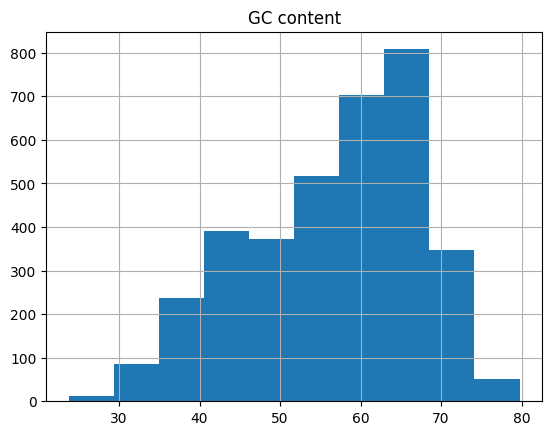

In [9]:
df = pd.DataFrame({"GC content": gc_contents})
df.hist()

In [10]:
df.describe()

,GC content
count,3528.000000
mean,56.561160
std,10.749021
min,23.745819
25%,48.420636
50%,58.461136
75%,65.022263
max,79.751462


In [11]:
# Print the number of training examples
print("LLM training examples:", len(np.load("./ec_data_v1/ec_v1_train_labels.npy")))

LLM training examples: 27048


# ESM 8M performance on predicting GC content

In [12]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(esm8m_embeddings)

/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


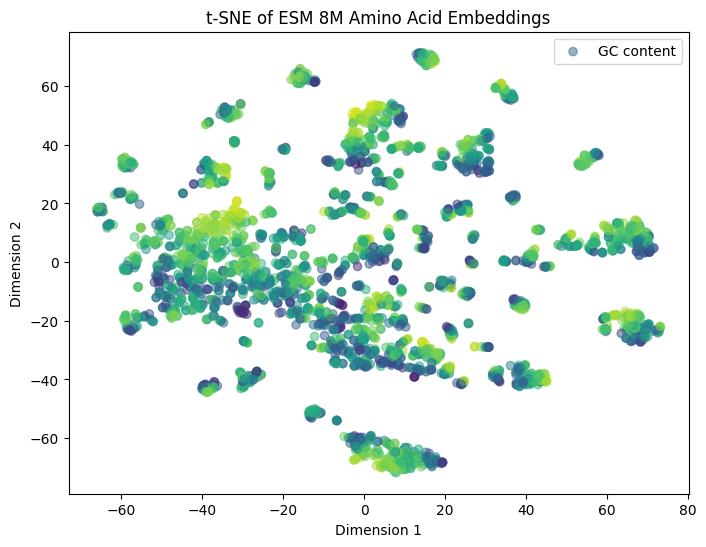

In [5]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
plt.scatter(
    embedded_data[:, 0],
    embedded_data[:, 1],
    c=gc_contents,
    cmap="viridis",
    alpha=0.5,
    label="GC content",
)

plt.title("t-SNE of ESM 8M Amino Acid Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [17]:
len(np.unique(labels))

27

In [19]:
ec_coarse_labels = np.array([".".join(label.split(".")[:2]) for label in labels])a

In [20]:
len(np.unique(ec_coarse_labels))

27

In [21]:
np.unique(labels)

array(['1.1', '1.10', '1.11', '1.12', '1.13', '1.14', '1.15', '1.16',
       '1.17', '1.18', '1.2', '1.20', '1.21', '1.3', '1.4', '1.5', '1.6',
       '1.7', '1.8', '1.9', '1.97', '2.1', '2.3', '2.7', '3.5', '4.2',
       '5.4'], dtype='<U4')

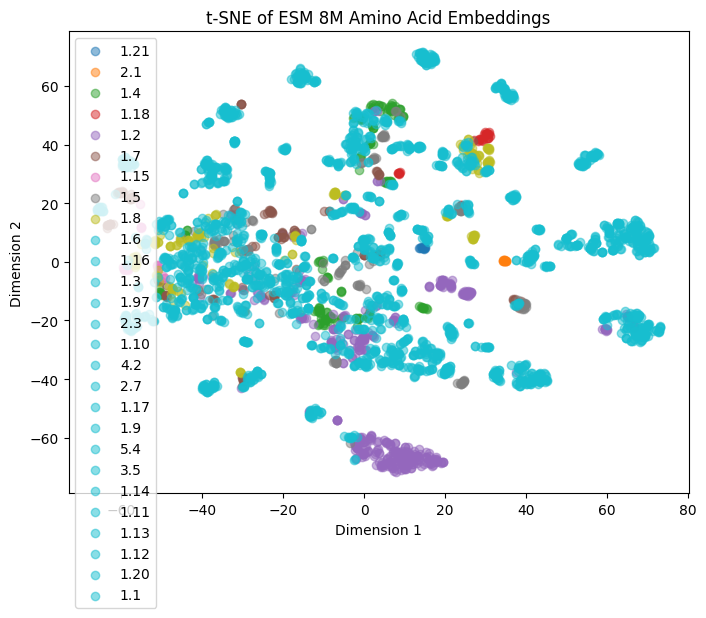

In [18]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))

# Define a color map for categorical labels
colors = plt.cm.tab10(range(len(set(labels))))

# Scatter plot with different colors for each category
for i, category in enumerate(set(labels)):
    indices = [j for j, label in enumerate(labels) if label == category]
    plt.scatter(
        embedded_data[indices, 0],
        embedded_data[indices, 1],
        c=[colors[i]],
        alpha=0.5,
        label=category,
    )


plt.title("t-SNE of ESM 8M Amino Acid Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X, y = esm8m_embeddings, np.array(gc_contents)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
regr.score(X_test, y_test)

/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8109203264272506

# Contrastive 8M amino acid performance on predicting GC content

In [7]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(aminoacid_embeddings)

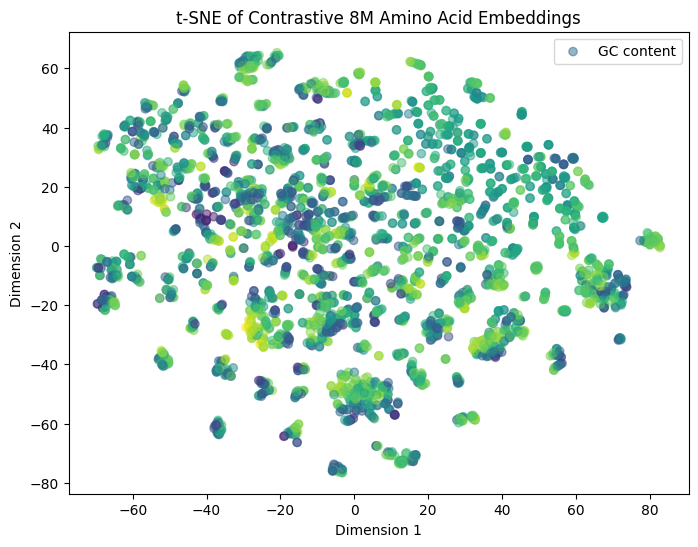

In [8]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
plt.scatter(
    embedded_data[:, 0],
    embedded_data[:, 1],
    c=gc_contents,
    cmap="viridis",
    alpha=0.5,
    label="GC content",
)

plt.title("t-SNE of Contrastive 8M Amino Acid Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X, y = aminoacid_embeddings, np.array(gc_contents)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
regr.score(X_test, y_test)

/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8137950241691922

# Contrastive 8M codon performance on predicting GC content

In [43]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(codon_embeddings)

In [40]:
import umap

reducer = umap.UMAP()
embedded_data = reducer.fit_transform(codon_embeddings)

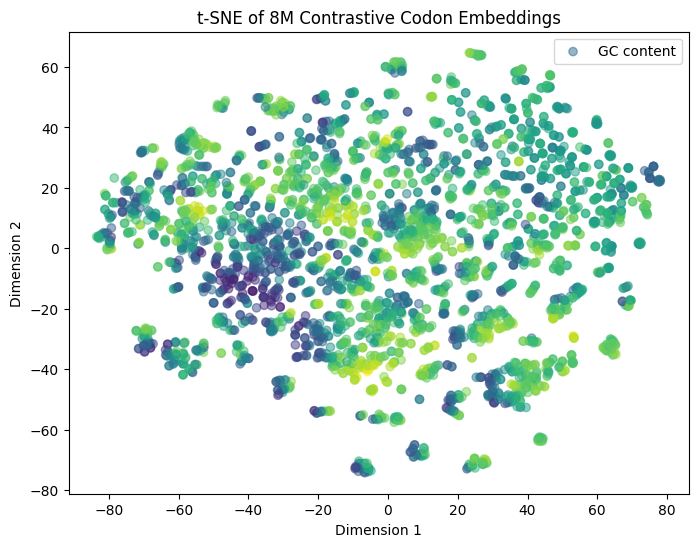

In [47]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
plt.scatter(
    embedded_data[:, 0],
    embedded_data[:, 1],
    c=gc_contents,
    cmap="viridis",
    alpha=0.5,
    label="GC content",
)

plt.title("t-SNE of 8M Contrastive Codon Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.savefig("figures/ec_contrastive_gc_tsne.png", dpi=600, bbox_inches="tight")
plt.show()

In [28]:
np.unique(labels)

array(['1.1', '1.10', '1.11', '1.12', '1.13', '1.14', '1.15', '1.16',
       '1.17', '1.18', '1.2', '1.20', '1.21', '1.3', '1.4', '1.5', '1.6',
       '1.7', '1.8', '1.9', '1.97', '2.1', '2.3', '2.7', '3.5', '4.2',
       '5.4'], dtype='<U4')

In [26]:
coarse_ec_labels = np.array([".".join(label.split(".")[0]) for label in labels])
np.unique(coarse_ec_labels)

array(['1', '2', '3', '4', '5'], dtype='<U1')

In [35]:
from collections import Counter

Counter(labels)

Counter({'1.1': 1068,
         '1.2': 420,
         '1.3': 360,
         '1.14': 336,
         '1.8': 168,
         '1.13': 168,
         '1.4': 156,
         '1.5': 156,
         '1.7': 144,
         '1.6': 96,
         '1.17': 84,
         '1.11': 84,
         '1.12': 36,
         '1.18': 36,
         '1.16': 36,
         '1.20': 24,
         '1.15': 24,
         '3.5': 24,
         '1.9': 12,
         '2.1': 12,
         '1.97': 12,
         '2.7': 12,
         '5.4': 12,
         '4.2': 12,
         '1.10': 12,
         '1.21': 12,
         '2.3': 12})

In [38]:
coarse_ec_labels = ["1.1", "1.2", "1.3", "1.14", "1.8", "1.13", "1.4", "1.7"]

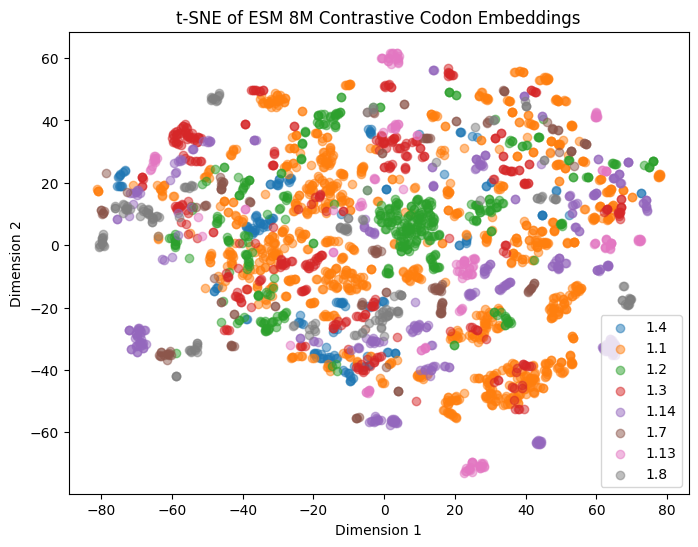

In [46]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))

# Define a color map for categorical labels
colors = plt.cm.tab10(range(len(set(coarse_ec_labels))))

# Scatter plot with different colors for each category
for i, category in enumerate(set(coarse_ec_labels)):
    indices = [j for j, label in enumerate(labels) if label == category]
    plt.scatter(
        embedded_data[indices, 0],
        embedded_data[indices, 1],
        c=[colors[i]],
        alpha=0.5,
        label=category,
    )


plt.title("t-SNE of ESM 8M Contrastive Codon Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.savefig("figures/ec_contrastive_ec_tsne.png", dpi=600, bbox_inches="tight")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X, y = codon_embeddings, np.array(gc_contents)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
regr.score(X_test, y_test)

/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9899404468811924

# Contrastive (8M) v.s. ESM (8M) performance on predicting GC content

| Model                  | Score   |
|------------------------|---------|
| ESM 8M                 | 0.8109  |
| Contrastive 8M Amino Acid | 0.8137  |
| Contrastive 8M Codon   | 0.9899  |